# Midterm 2

# Time Limit - 2.30 pm to 6.30 pm

# 20 + 20 - 40 Marks

### Instructions

- The exam must be submitted on D2L by 6.30pm. No exceptions here. Only a single .ipynb file

- Most Important - Your submitted code should not match a code from the internet. If it does, it is a straight 0.

- The grades for Midterm1 and Midterm2, both will be considered and i will average out the grades.

- You must submit individually You will be liable for penalties if your work matches exactly the other person in your class or from the internet. So be careful.

## Problem 1
### The relevant Dataset (CIFAR 100) have been described below.




This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 100 fine-grained classes that are grouped into 20 coarse-grained classes.

- Images have low resolution (32x32). 

- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

Read the website thoroughly.

The dataset can be directly fetched from Keras.io Website for easy incorporation into your code.
https://keras.io/api/datasets/cifar100/

### CIFAR-100 Image label detection of provided images

### Choose PCA+Random Forest+XGBoost And apply the techniques to the CIFAR-100 Dataset to Classify the Images.

### Apply PCA for reducing Dimensions. [5 Marks]
### Apply Random Forest with AdaBoost for model creation. [5 Marks].
### Recall or Precision Value? Which one should be optimised?? Show your optimised confusion matrix. [5 Marks]

### Download the 4 images provided on D2L. These images are of television,camel,wardrobe, and truck. Create a validation dataset using these images and predict the labels using the model of CIFAR-100 created by you as above. [5 Marks]

In [ ]:
#Importing Library
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Importing dataset CIFAR-100
(X_train, y_train), (X_test, y_test) = datasets.cifar100.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  100
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


Applying PCA

In [ ]:
#getting min max value 
np.min(X_train),np.max(X_train)

(0, 255)

In [ ]:
# Lets Normalize pixel values
X_train= X_train / 255.0
X_test = X_test/255.0

In [ ]:
#getting min max value 
np.min(X_train),np.max(X_train)

(0.0, 1.0)

In [ ]:
X_train_flat = X_train.reshape(-1,3072)
X_test_flat = X_test.reshape(-1,3072)

In [ ]:
#Applying PCA
from sklearn.decomposition import PCA
pca_cifar_train = PCA(0.95)
pca_train = pca_cifar_train.fit_transform(X_train_flat)

In [ ]:
pca_cifar_train.n_components_

202

In [ ]:
train_img = pca_cifar_train.inverse_transform(pca_train)
train_img

array([[0.99237723, 1.04300595, 1.08029623, ..., 0.39478951, 0.41245041,
        0.22241171],
       [0.97603838, 0.98710233, 0.96380074, ..., 1.02405293, 1.01687433,
        1.02550249],
       [0.99155521, 0.96963419, 0.96869047, ..., 0.9623983 , 0.92000751,
        0.86371454],
       ...,
       [1.04549596, 1.00873445, 0.95956725, ..., 0.82737772, 0.78803809,
        0.72424315],
       [0.61245299, 0.59895963, 0.47338327, ..., 0.64571924, 0.61279838,
        0.46094629],
       [0.11974419, 0.25576311, 0.47665649, ..., 0.13940589, 0.15387344,
        0.27830034]])

In [ ]:
# Dataset class labels
labels =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
           'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
           'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard', 
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
           'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 
           'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
           'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
           'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
           'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

In [ ]:
pca_test = pca_cifar_train.transform(X_test_flat)

In [ ]:
pca_train.shape

(50000, 202)

In [ ]:
pca_test.shape

(10000, 202)

In [ ]:
#XG boost and base estimator 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
rfc = RandomForestClassifier(n_estimators=10)
# Create XGboost classifer object
xg_reg = xgb.XGBClassifier(n_estimators=10,learning_rate=1,base_estimator=rfc,n_jobs=-1,nthread=2) 
xg_reg

XGBClassifier(base_estimator=RandomForestClassifier(n_estimators=10),
              learning_rate=1, n_estimators=10, n_jobs=-1, nthread=2)

In [ ]:
# Train XGBoost Classifer
model = xg_reg.fit(pca_train, y_train.flatten(),verbose=True)

#Predict the response for test dataset
y_pred = model.predict(pca_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.16      0.21       100
           1       0.13      0.11      0.12       100
           2       0.02      0.02      0.02       100
           3       0.11      0.12      0.12       100
           4       0.08      0.08      0.08       100
           5       0.04      0.03      0.03       100
           6       0.05      0.03      0.04       100
           7       0.14      0.10      0.12       100
           8       0.10      0.04      0.06       100
           9       0.10      0.10      0.10       100
          10       0.07      0.05      0.06       100
          11       0.07      0.05      0.06       100
          12       0.14      0.12      0.13       100
          13       0.05      0.07      0.06       100
          14       0.06      0.05      0.06       100
          15       0.07      0.05      0.06       100
          16       0.05      0.02      0.03       100
          17       0.19    

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 38.496565


In [ ]:
#evaluate model
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[16,  2,  1, ...,  0,  0,  2],
       [ 0, 11,  0, ...,  2,  1,  0],
       [ 1,  1,  2, ...,  5,  4,  0],
       ...,
       [ 0,  2,  3, ...,  7,  2,  2],
       [ 1,  1,  4, ...,  1,  1,  0],
       [ 0,  1,  1, ...,  1,  0,  7]])

In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0896


In [ ]:
from keras.preprocessing import image
camel = image.load_img("camel.jpg", target_size=(32,32,3))
televison = image.load_img("television.jpg", target_size=(32,32,3))
truck = image.load_img("truck.jpg", target_size=(32,32,3))
wardrobe = image.load_img("wardrobe.jpg", target_size=(32,32,3))

In [ ]:
l = [camel,televison,truck,wardrobe]

label index [47]
maple_tree


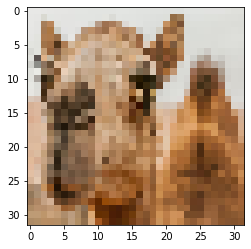

label index [82]
sunflower


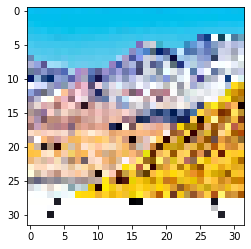

label index [81]
streetcar


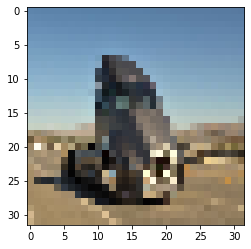

label index [67]
ray


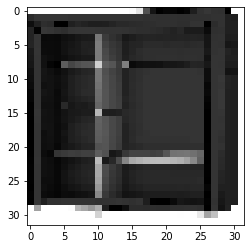

In [ ]:
for i in l:
  image_1 = image.img_to_array(i) 
  image_1 = image_1 / 255.0
  image_1 = image_1.reshape(-1,3072)
  prediction_image_1 = np.array(image_1)
  prediction_image_1 = np.expand_dims(image_1, axis=0)
  prediction_image_1 = prediction_image_1.reshape(-1)
  df = pd.DataFrame(prediction_image_1)
  df = df.T
  df[3073] =0
  principalComponents_df = pca_cifar_train.transform(df.iloc[:,:-1])
  # Get prediction
  prediction_1 = model.predict(principalComponents_df[[0]])
  print("label index",prediction_1)
  print(labels[prediction_1[0]])
  grid_data = image_1.reshape(32,32,3)
  plt.imshow(grid_data, interpolation = "none", cmap = "gray")
  plt.show()


label index [67]
ray


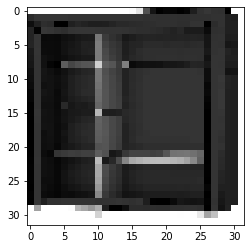

In [ ]:
##Validating image
from keras.preprocessing import image

image_1 = image.load_img("wardrobe.jpg", target_size=(32,32,3))
image_1 = image.img_to_array(image_1) 
image_1 = image_1 / 255.0
image_1 = image_1.reshape(-1,3072)
#image_1.shape
prediction_image_1 = np.array(image_1)
prediction_image_1
#prediction_image_1.ndim
prediction_image_1 = np.expand_dims(image_1, axis=0)
prediction_image_1 = prediction_image_1.reshape(-1)
#prediction_image_1
df = pd.DataFrame(prediction_image_1)
df = df.T
df[3073] =0
df
principalComponents_df = pca_cifar_train.transform(df.iloc[:,:-1])
#principalComponents_df = pd.DataFrame(principalComponents_df)
principalComponents_df
# Get prediction
prediction_1 = model.predict(principalComponents_df[[0]])
print("label index",prediction_1)
print(labels[prediction_1[0]])
grid_data = image_1.reshape(32,32,3)
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()


## Problem 2

## Perform Text Classification on the tweet data about COVID19. The tweets have been pulled from Twitter and manual tagging has been done then. The relevant CSV file have been attached in D2L.

## A sample .ipynb work file for this problem have been provided with spam.csv file (File used in Class). This file contains code for TF-IDF along with Gensim LDA package to find latent topics for the tweets (Topic Modelling). 

## Top of the code file contains relevent references for the code, please go through them. Few things are missing in the code that you need to apply to complete it.

### 1. Use the original Tweet File instead of my sample spam.csv file for your work. [2 Marks]
### 2. Properly remove punctuations, stopwords and any words of length 1 or 2. [3 Marks]
### 3. Get the wordcloud (as mentioned in the code) after apply step 1 (This has not been done in the code). [2 Marks]
### 4. Change number of Topics to 20 in the Gensim LDAMulticore and draw the visualisation asshown in samplecode. [3 Marks]
### 5. Write a complete code using TF-IDF along with Random Forest Classifier to build a Tweet Sentiment classification Model.Use your own discretion to determine the relevant hyperparameters and model parameters. Make sure to provide justification while dropping a column. Remember this is a multiclass classification problem. Give the relevant precision and recall for the model.[10 Marks]


## Columns:
## 1) Location
## 2) Tweet At
## 3) Original Tweet
## 4) Sentiment (To be predicted)

In [ ]:
# 1.  Use the original Tweet File instead of my sample spam.csv file for your work. [2 Marks]

In [ ]:
import nltk
nltk.download('stopwords')

import gensim
from gensim import corpora, models

from pprint import pprint


In [ ]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd

stopwords = nltk.corpus.stopwords.words('english')
messages = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')

In [ ]:
messages.head()

In [ ]:
# 2. Properly remove punctuations, stopwords and any words of length 1 or 2. [3 Marks]

In [ ]:
messages['punctuation_removal'] = messages['OriginalTweet'].str.replace('[^\w\s]','', regex=True)

In [ ]:
#stopwords = set(stopwords.words('english'))
stopwords =  ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s',
              'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])

messages["punctuation_removal"] = messages["punctuation_removal"].apply(lambda text: remove_stopwords(text))
messages.head()

In [ ]:
def remove_length(text):
    return ' '.join([w for w in str(text).split() if len(w)>2])

messages["punctuation_removal"] = messages["punctuation_removal"].apply(lambda text: remove_length(text))
messages.head()

In [ ]:
# 3. Get the wordcloud (as mentioned in the code) after apply step 1 (This has not been done in the code). [2 Marks]

In [ ]:
#word cloud visualization for the text
from wordcloud import WordCloud #visualization techniques for #frequently repeated texts
wc = WordCloud(
    background_color='black',
    max_words = 100,
    random_state = 42,
    max_font_size=110
    )

wc.generate(' '.join(messages['punctuation_removal']))
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()

In [ ]:
# 4. Change number of Topics to 20 in the Gensim LDAMulticore and draw the visualisation asshown in samplecode. [3 Marks]

In [ ]:
documents = messages['punctuation_removal'].tolist()

# remove common words and tokenize
texts = [
    [word for word in document.lower().split() if word not in stopwords]
    for document in documents
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
corpus[1:2]

In [ ]:
tfidf = models.TfidfModel(corpus)

corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

In [ ]:
lda_model = gensim.models.LdaMulticore(corpus_tfidf, 
                                       num_topics=20, 
                                       id2word = dictionary, 
                                       passes = 2, 
                                       workers=2)

In [ ]:
#explore the words occuring in that topic and its relative weight
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

In [ ]:
top_topics = lda_model.top_topics(corpus_tfidf)
num_topics = 20
# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_tfidf))  
# a measure of how good the model is. lower the better.


In [ ]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus_tfidf, dictionary)
vis

5. Write a complete code using TF-IDF along with Random Forest Classifier to build a Tweet Sentiment classification Model.Use your own discretion to determine the relevant hyperparameters and model parameters. Make sure to provide justification while dropping a column. Remember this is a multiclass classification problem. Give the relevant precision and recall for the model.[10 Marks]
Columns:
1) Location
2) Tweet At
3) Original Tweet
4) Sentiment (To be predicted)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidf_vect = TfidfVectorizer(min_df=5, max_df=0.7)
X_tfidf = tfidf_vect.fit_transform(messages['punctuation_removal'])
X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X_features, messages['Sentiment'], test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=10, random_state=0)  
text_classifier.fit(X_train, y_train)

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))